# SENTIMENT ANALYSIS OF REVIEWS

## TASK 1:

### Overview:



In [1]:
#importing modules
import re
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

#scikit-learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#downloading Punkt Tokenizer Models to allow word_tokenize to work
nltk.download('punkt')
#downloading stopwords which contains a list of stopwords that we can ignore
nltk.download('stopwords')

#reading out car_reviews.csv into a DataFrame
dataset = pd.read_csv('car_reviews.csv')

#renaming PorterStemmer for ease of use
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neelp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neelp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#loading first review/row of data
example_text = dataset['Review'][0]
#turning text to lowercase
text = example_text.lower()
#removing characters that aren't in the alphabet
text = re.sub('[^a-z]', ' ', text)
#splitting text into tokens
tokenize = word_tokenize(text)
#iterating through the tokens and add the token to a list if it doesn't appear in "stopwords"
word_list = [word for word in tokenize if word not in set(stopwords.words('english'))]
#turning list into a string
final_text = " ".join(word_list)

#showing comparison of raw data against processed data
print(example_text)
print('')
print(final_text)

 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I dont think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 

bought new taurus really loved decided try new taurus care style newer version bought anyway like new car half much liked one thee dash much deep takes lot room find seats com

In [4]:
#creating 3 examples of words that have the same stem
word1_list = ['connections', 'connected', 'connecting', 'connection']
word2_list = ['likes', 'liked', 'liking', 'likely']
word3_list = ['programer', 'programs', 'programming', 'programers']

#going through all 3 of the lists and adding the stem of each word to a list
stem1_list = [ps.stem(word) for word in word1_list]
stem2_list = [ps.stem(word) for word in word2_list]
stem3_list = [ps.stem(word) for word in word3_list]

#comparing original word list to stems list
print(str(word1_list) + ' ----> ' + str(stem1_list))
print(str(word2_list) + ' ----------------------> ' + str(stem2_list))
print(str(word3_list) + ' ------> ' + str(stem3_list))

['connections', 'connected', 'connecting', 'connection'] ----> ['connect', 'connect', 'connect', 'connect']
['likes', 'liked', 'liking', 'likely'] ----------------------> ['like', 'like', 'like', 'like']
['programer', 'programs', 'programming', 'programers'] ------> ['program', 'program', 'program', 'program']


In [5]:
def cleaning(text):
    '''Function for cleaning a piece of data where the input is a string'''
    
    #turning text to lowercase
    text = text.lower()
    #removing characters that aren't in the alphabet
    text = re.sub('[^a-z]', ' ', text)
    #splitting text into tokens
    tokenize = word_tokenize(text)
    #adding STEM of the tokens that aren't in "stopwords" to a list
    stem_list = [ps.stem(word) for word in tokenize if word not in set(stopwords.words('english'))]
    #turning list into a string
    joined_text = ' '.join(stem_list)
    
    return joined_text

In [6]:
def display_matrix(matrix):
    '''Function for showing the confusion matrix of a classifier'''
    
    #list of results of the classifer
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    #finding number of each result
    counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
    #finding percentage weighting of each result
    percentages = ["{0:.2%}".format(value) for value in (matrix.flatten() / np.sum(matrix))]
    
    #creating a list of all values above
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    #creating a heatmap and adding annotations to it 
    visualisation = sns.heatmap(matrix, annot = labels, fmt = '', cmap = 'Blues')
    
    return visualisation

In [7]:
#list to store the cleaned reviews we are processing
data = []

#going through each review in the dataframe
for i in range(dataset.shape[0]):
    #selecting review in pandas DataFrame
    text = dataset.iloc[i, 1]
    #clean review using cleaning function
    cleaned_text = cleaning(text)
    #adding cleaned review to a list
    data.append(cleaned_text)

In [8]:
#going through first 3 reviews in the dataframe
for i in range(3):
    text = dataset['Review'][i]
    #clean review
    cleaned_text = cleaning(text)
    
    #converting text into a vector of token counts
    vect = CountVectorizer()
    vector = vect.fit_transform([cleaned_text])
    #putting vector into a dataframe
    DF = pd.DataFrame(vector.A, columns = vect.get_feature_names())
    
    #displaying vectors for each review
    print('The count vector for review ' + str(i) + ' is:')
    display(DF)
    print('')

The count vector for review 0 is:


,anyway,back,batteri,bought,buy,car,card,care,chang,comfort,...,take,tank,tauru,thee,think,tire,tri,version,way,would
0,1,1,1,2,1,1,1,1,1,1,...,1,1,3,1,1,1,1,1,1,2



The count vector for review 1 is:


,allow,anoth,anyon,area,basi,better,breez,busi,buy,car,...,uncomfort,unnecessarili,us,usag,usual,weigh,well,went,work,would
0,1,1,1,1,1,1,1,2,1,7,...,4,1,3,1,1,1,1,1,1,2



The count vector for review 2 is:


,addit,air,also,approxim,back,balanc,began,belt,bought,broke,...,valv,vehicl,vibrat,week,went,within,work,wrong,yard,year
0,1,3,1,1,1,1,1,4,1,1,...,1,4,1,5,2,3,1,1,1,1


The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.

Accuracy: 76.53% 



<AxesSubplot:>

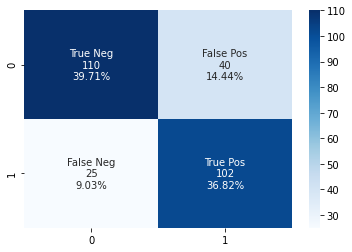

In [9]:
#converting all reviews into a vector of token counts using unigrams
vector = CountVectorizer()
X = vector.fit_transform(data).toarray()
Y = dataset.iloc[:, 0]

#creating training and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1429)

#displaying number of reviews being trained and tested on
print('The number of reviews in the training set is: ' + str(len(X_train)) + '.')
print('The number of reviews in the test set is: ' + str(len(X_test)) + '.')
print('')

#using Multinomial Naive Bayes classifier on training data
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

#predict sentiment for test data
Y_pred = classifier.predict(X_test)

#get confusion matrix and accuracy for prediction
cf_matrix = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

#display accuracy of the classifer
print('Accuracy: %.2f%% ' % (accuracy * 100.0))
print('')

#display confusion matrix
display_matrix(cf_matrix)

# TASK 2

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.

Accuracy: 80.14% 



<AxesSubplot:>

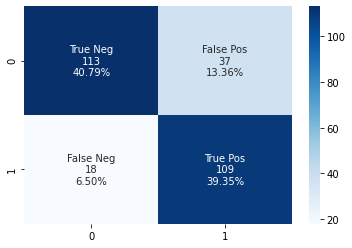

In [10]:
#convert all the reviews into a vector of tokens using unigrams AND bigrams
vector2 = CountVectorizer(ngram_range=(1,2))
X2 = vector2.fit_transform(data).toarray()
Y2 = dataset.iloc[:, 0]

#create another set of training and test data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1429)

#displaying number of reviews being trained and tested on
print('The number of reviews in the training set is: ' + str(len(X2_train)) + '.')
print('The number of reviews in the test set is: ' + str(len(X2_test)) + '.')
print('')

#using Multinomial Naive Bayes classifier on training data
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

#predict new sentiment for test data
Y2_pred = classifier2.predict(X2_test)

#get new confusion matrix and accuracy for prediction
cf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
accuracy2 = accuracy_score(Y2_test, Y2_pred)

#display accuracy of the classifer
print('Accuracy: %.2f%% ' % (accuracy2 * 100.0))
print('')

#display confusion matrix
display_matrix(cf_matrix2)